In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
ann_results = pd.read_csv("../.systemfiles/ann_results.csv")
rf_results = pd.read_csv("../.systemfiles/rf_results.csv")
xgb_results = pd.read_csv("../.systemfiles/xgb_results.csv")
logit_results = pd.read_csv("../.systemfiles/logit_results.csv")

In [14]:
import matplotlib.pyplot as plt

# List of DataFrames and model names for easy iteration
results = [ann_results, logit_results, xgb_results, rf_results]
model_names = ["ANN", "Logistic Regression", "XGBoost", "Random Forest"]
colors = ['b', 'g', 'y', 'c']  # Colors for each model


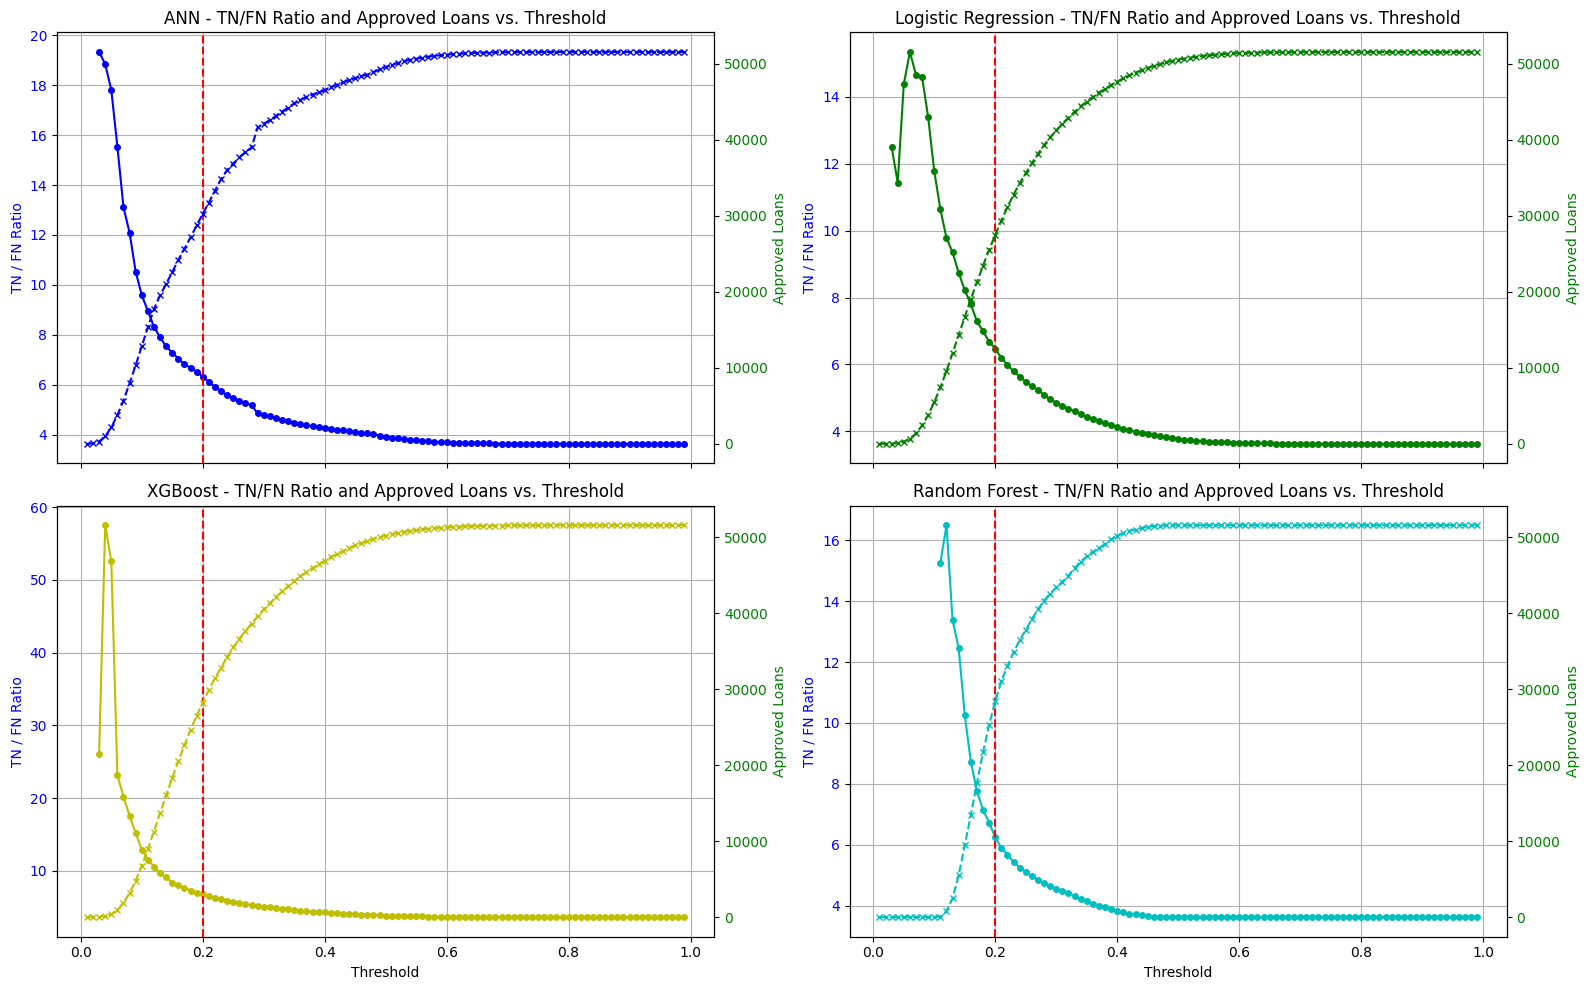

In [15]:
# Set up the figure with a 2x2 grid of subplots
num_models = len(results)
fig, axs = plt.subplots(2, 2, figsize=(16, 10), sharex=True)

# Flatten the 2D array of axes for easier iteration
axs = axs.flatten()

# Loop through each model and create a subplot
for i, (df, model_name, color) in enumerate(zip(results, model_names, colors)):
    thresholds = df['Threshold']
    ratios = df['Ratio']
    approved_loans = df['Approved Loan']
    
    # Plot TN/FN Ratio on the left y-axis
    ax1 = axs[i]
    ax1.plot(thresholds, ratios, marker='o', markersize=4, color=color, label=model_name)
    ax1.set_ylabel('TN / FN Ratio', color='b')
    ax1.tick_params(axis='y', labelcolor='b')
    ax1.grid()

    # Create a secondary y-axis for Approved Loans
    ax2 = ax1.twinx()
    ax2.plot(thresholds, approved_loans, marker='x', markersize=4, linestyle='--', color=color)
    ax2.set_ylabel('Approved Loans', color='g')
    ax2.tick_params(axis='y', labelcolor='g')

    # Vertical line at threshold = 0.2 for reference
    ax1.axvline(x=0.2, color='r', linestyle='--', label='Threshold = 0.2')
    
    # Title for each subplot
    ax1.set_title(f'{model_name} - TN/FN Ratio and Approved Loans vs. Threshold')

# Set x-label for the shared x-axis
for ax in axs[2:]:  # Only set x-label for the last row
    ax.set_xlabel('Threshold')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

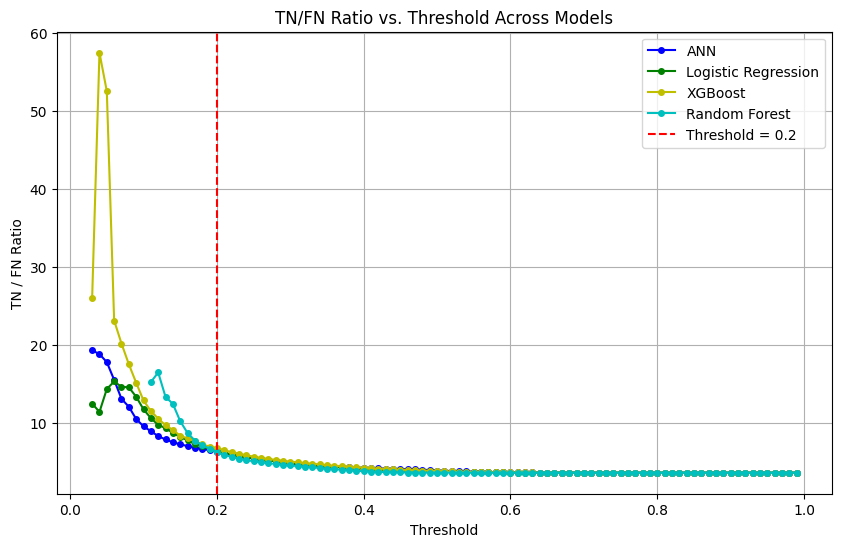

In [ ]:
# Set up the figure for TN/FN Ratio vs. Threshold
plt.figure(figsize=(10, 6))

for df, model_name, color in zip(results, model_names, colors):
    thresholds = df['Threshold']
    ratios = df['Ratio']
    
    # Plot TN/FN Ratio with a unique color for each model
    plt.plot(thresholds, ratios, marker='o', markersize=4, color=color, label=model_name)

# Labeling and aesthetics
plt.xlabel('Threshold')
plt.ylabel('TN / FN Ratio')
plt.title('TN/FN Ratio vs. Threshold Across Models')
plt.axvline(x=0.2, color='r', linestyle='--', label='Threshold = 0.2')
plt.legend()
plt.grid()
plt.show()


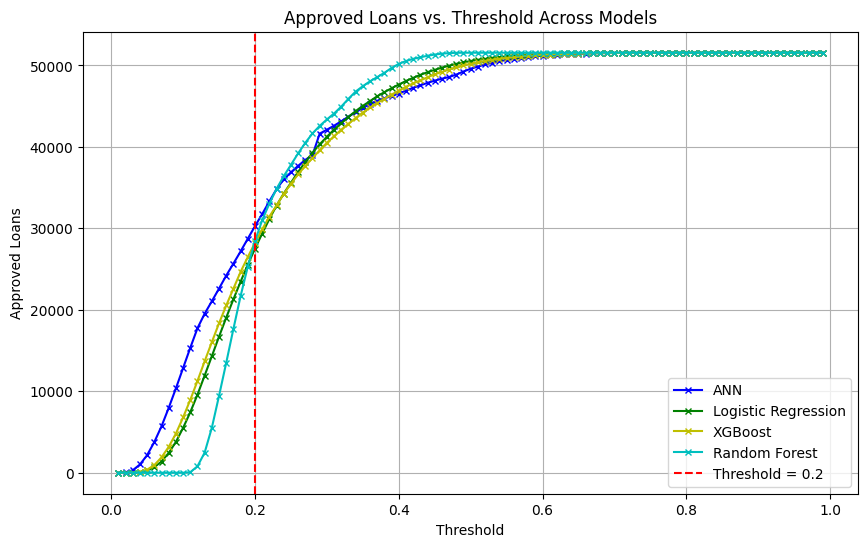

In [10]:
# Set up the figure for Approved Loans vs. Threshold
plt.figure(figsize=(10, 6))

for df, model_name, color in zip(results, model_names, colors):
    thresholds = df['Threshold']
    approved_loans = df['Approved Loan']
    
    # Plot Approved Loans with a unique color for each model
    plt.plot(thresholds, approved_loans, marker='x', markersize=4, color=color, label=model_name)

# Labeling and aesthetics
plt.xlabel('Threshold')
plt.ylabel('Approved Loans')
plt.title('Approved Loans vs. Threshold Across Models')
plt.axvline(x=0.2, color='r', linestyle='--', label='Threshold = 0.2')
plt.legend()
plt.grid()
plt.show()


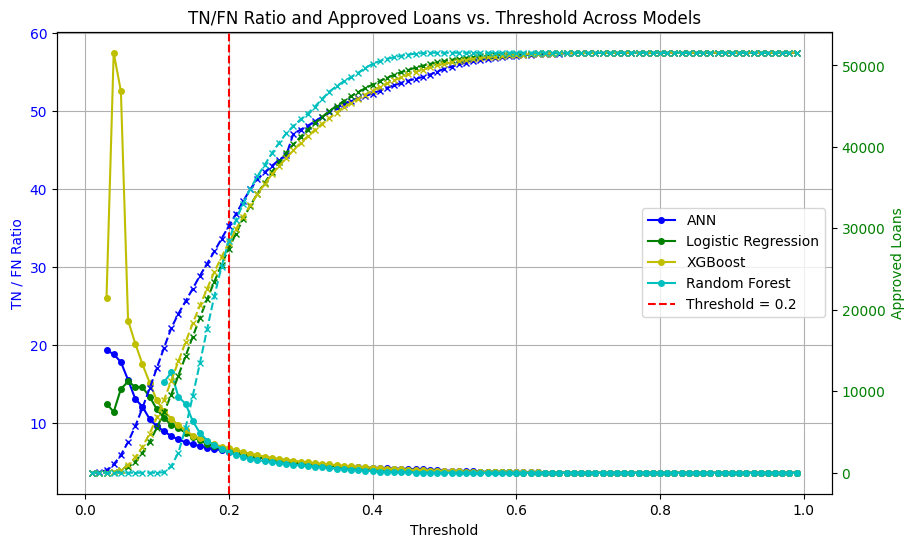

In [15]:
# Set up the figure
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot TN/FN Ratio on the left y-axis (solid lines for each model)
for df, model_name, color in zip(results, model_names, colors):
    thresholds = df['Threshold']
    ratios = df['Ratio']
    ax1.plot(thresholds, ratios, marker='o', markersize=4, color=color, label=model_name)
ax1.set_xlabel('Threshold')
ax1.set_ylabel('TN / FN Ratio', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid()

# Create a secondary y-axis for Approved Loans (dashed lines for each model)
ax2 = ax1.twinx()
for df, model_name, color in zip(results, model_names, colors):
    thresholds = df['Threshold']
    approved_loans = df['Approved Loan']
    ax2.plot(thresholds, approved_loans, marker='x', markersize=4, linestyle='--', color=color)
ax2.set_ylabel('Approved Loans', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Vertical line at threshold = 0.2 for reference
ax1.axvline(x=0.2, color='r', linestyle='--', label='Threshold = 0.2')

# Simplified legend with only model names
ax1.legend(loc='center right')

# Title and show plot
plt.title('TN/FN Ratio and Approved Loans vs. Threshold Across Models')
plt.show()